In [20]:
import numpy as np
import scipy as sp
import os 
import sys
import importlib
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
util_path = 'C:/ASM/Dropbox/Developments/Jupyter/Eating/myutils' if 'C:' in os.getcwd() else './myutils'
sys.path.append(util_path)
import my_file_utils as mfileu
import my_steven_free_utils as msfreeu

In [22]:
annots = mfileu.read_file('data', 'free_annots_steven_processed.pkl')

In [23]:
RF_our = 'RF'
all_proba_rf = mfileu.read_file('all_proba2', 'all_proba_bite_free_{}.pkl'.format(RF_our))
pct_proba_rf = mfileu.read_file('pct_proba2', 'pct_proba_bite_free_{}.pkl'.format(RF_our))
all_bf_percentile_rf = mfileu.read_file('all_bites_frames', 'all_bites_frames_percentile_{}.pkl'.format(RF_our))
all_bf_proba_rf = mfileu.read_file('all_bites_frames', 'all_bites_frames_proba_{}.pkl'.format(RF_our))

In [24]:
RF_our = 'our'
all_proba_our = mfileu.read_file('all_proba2', 'all_proba_bite_free_{}.pkl'.format(RF_our))
pct_proba_our = mfileu.read_file('pct_proba2', 'pct_proba_bite_free_{}.pkl'.format(RF_our))
all_bf_percentile_our = mfileu.read_file('all_bites_frames', 'all_bites_frames_percentile_{}.pkl'.format(RF_our))
all_bf_proba_our = mfileu.read_file('all_bites_frames', 'all_bites_frames_proba_{}.pkl'.format(RF_our))

In [25]:
total_frames = 0
for subj in range(len(all_proba_rf)):
    for sess in range((len(all_proba_rf[subj]))):
        total_frames += len(all_proba_rf[subj][sess])
print(total_frames)

1722708


In [42]:
# Using Probability threshold
res = []
for p in range(20, 100, 10):
    proba = p/100    
    tp1, fp1 = all_bf_proba_our[proba]["frame"]["tp"], all_bf_proba_our[proba]["frame"]["fp"]
    tp2, fp2 = all_bf_proba_rf[proba]["frame"]["tp"], all_bf_proba_rf[proba]["frame"]["fp"]
    res.append([proba, tp1, fp1, tp2, fp2])    

res = np.array(res)

print(res)

[[2.000e-01 8.964e+03 4.542e+03 7.213e+03 7.499e+03]
 [3.000e-01 7.515e+03 3.237e+03 2.362e+03 1.635e+03]
 [4.000e-01 6.398e+03 2.403e+03 7.490e+02 3.980e+02]
 [5.000e-01 5.371e+03 1.798e+03 2.310e+02 9.700e+01]
 [6.000e-01 4.450e+03 1.315e+03 6.700e+01 1.400e+01]
 [7.000e-01 3.511e+03 8.600e+02 1.700e+01 1.000e+00]
 [8.000e-01 2.465e+03 4.890e+02 1.000e+00 0.000e+00]
 [9.000e-01 1.133e+03 1.730e+02 0.000e+00 0.000e+00]]


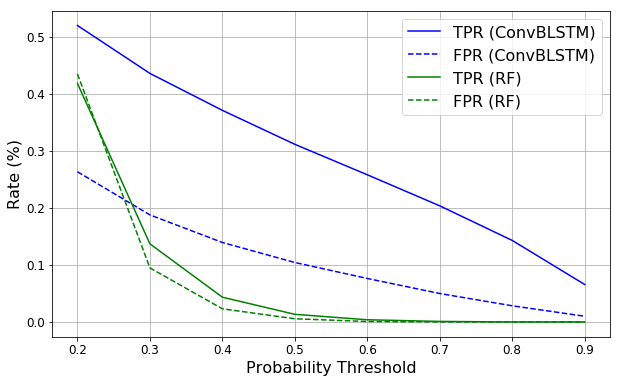

In [43]:
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)  

ax.plot(res[:,0], 100*res[:, 1]/total_frames, label= 'TPR (ConvBLSTM)', color='blue')
ax.plot(res[:,0], 100*res[:, 2]/total_frames, label= 'FPR (ConvBLSTM)', color='blue', linestyle='--')
ax.plot(res[:,0], 100*res[:, 3]/total_frames, label= 'TPR (RF)', color='green')
ax.plot(res[:,0], 100*res[:, 4]/total_frames, label= 'FPR (RF)', color='green', linestyle='--', )

#plt.scatter(99.77, y=tp1_f/total_frames, color='red', marker='d', s=50, label= 'TPR (ConvBLSTM) at p=0.5')
#plt.scatter(99.77, y=fp1_f/total_frames, color='red', marker='*', s=50, label= 'FPR (ConvBLSTM) at p=0.5')
#plt.scatter(99.77, y=tp2_f/total_frames, color='red', marker='o', s=50, label= 'TPR (RF) at p=0.5')
#plt.scatter(99.77, y=fp2_f/total_frames, color='red', marker='x', s=50, label= 'FPR (RF) at p=0.5')

#plt.axhline(y=tp1_f/total_frames, color='red', linestyle='-', label= 'TPR (ConvBLSTM) at p=0.5')
#plt.axhline(y=fp1_f/total_frames, color='red', linestyle='--', label= 'FPR (ConvBLSTM) at p=0.5')
#plt.axhline(y=tp2_f/total_frames, color='black', linestyle='-', label= 'TPR (RF) at p=0.5')
#plt.axhline(y=fp2_f/total_frames, color='black', linestyle='--', label= 'FPR (RF) at p=0.5')

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)       
    #tick.label.set_rotation('vertical')

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 

#plt.title("", fontsize=16)
plt.xlabel("Probability Threshold", fontsize=16)        
plt.ylabel("Rate (%)", fontsize=16)            
plt.legend(fontsize=16)
#plt.xlim([0.2, 0.9])
plt.grid(True)
plt.show()       

In [28]:
############# Using Percentile

In [34]:
off_on = "offline"
assert off_on in ['offline', 'online']

In [35]:
ticks = list(range(9970, 10000, 5))
ticks = np.array(ticks)/100
print(ticks)

count = len(ticks)
data_a = np.zeros((count, 25))
data_b = np.zeros((count, 25))
for i in range(count):
    if off_on == "offline":
        data_a[i, :] = pct_proba_our[pct_proba_our[:, 2]==ticks[i], -2]
        data_b[i, :] = pct_proba_rf[pct_proba_rf[:, 2]==ticks[i], -2]
    else:
        data_a[i, :] = pct_proba_our[pct_proba_our[:, 2]==ticks[i], -1]
        data_b[i, :] = pct_proba_rf[pct_proba_rf[:, 2]==ticks[i], -1]
    
data_a = data_a.tolist()
data_b = data_b.tolist()

[99.7  99.75 99.8  99.85 99.9  99.95]


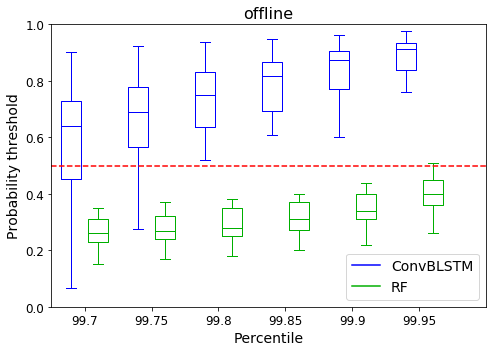

In [36]:
def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

#plt.figure()
fig = plt.figure(figsize=(7,5))
ax = plt.subplot(111)  

bpl = plt.boxplot(data_a, positions=np.array(range(len(data_a)))*2.0-0.4, sym='', widths=0.6)
bpr = plt.boxplot(data_b, positions=np.array(range(len(data_b)))*2.0+0.4, sym='', widths=0.6)
set_box_color(bpl, '#0000FF') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#00AF00')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#0000FF', label='ConvBLSTM')
plt.plot([], c='#00AF00', label='RF')
plt.legend(fontsize=14)

plt.axhline(y=0.5, color='r', linestyle='--')

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)       
    #tick.label.set_rotation('vertical')

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 


plt.xlabel("Percentile", fontsize=14)     
plt.ylabel("Probability threshold", fontsize=14)        

plt.title(off_on, fontsize=16)
plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-1, len(ticks)*2)
plt.ylim(0, 1)
plt.tight_layout()


In [37]:
res = []
for p in range(9970, 10000, 1):
    percentile = p/100    
    tp1, fp1 = all_bf_percentile_our[percentile]["frame_"+off_on]["tp"], all_bf_percentile_our[percentile]["frame_"+off_on]["fp"]
    tp2, fp2 = all_bf_percentile_rf[percentile]["frame_"+off_on]["tp"], all_bf_percentile_rf[percentile]["frame_"+off_on]["fp"]      
    res.append([percentile, tp1, fp1, tp2, fp2])    

res = np.array(res)

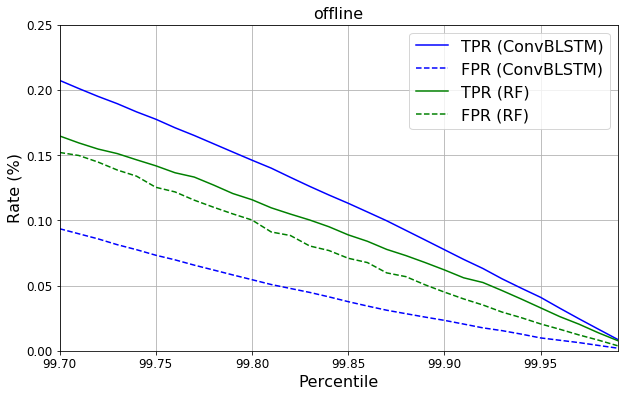

In [39]:
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)  

ax.plot(res[:,0], 100*res[:, 1]/total_frames, label= 'TPR (ConvBLSTM)', color='blue')
ax.plot(res[:,0], 100*res[:, 2]/total_frames, label= 'FPR (ConvBLSTM)', color='blue', linestyle='--')
ax.plot(res[:,0], 100*res[:, 3]/total_frames, label= 'TPR (RF)', color='green')
ax.plot(res[:,0], 100*res[:, 4]/total_frames, label= 'FPR (RF)', color='green', linestyle='--', )

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)       
    #tick.label.set_rotation('vertical')

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 

plt.title(off_on, fontsize=16)
plt.xlabel("Percentile", fontsize=16)        
plt.ylabel("Rate (%)", fontsize=16)            
plt.legend(fontsize=16)
plt.xlim([99.7, 99.99])
plt.ylim([0, 0.25])
plt.grid(True)
plt.show()       

p = pct_proba_our
p = p[p[:, 2]==99.9, :]
plt.hist(p[:, -2], bins=10, edgecolor='black', hatch='/', label='Our', color='green', alpha=0.5)

p = pct_proba_steven
p = p[p[:, 2]==99.9, :]
plt.hist(p[:, -2], bins=10, edgecolor='black', hatch='+', label='Baseline', color='blue', alpha=0.5)

plt.title("Histogram (99.9 percentile probability)", fontsize=14)
plt.xlabel('Probabllity', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid()
plt.legend(fontsize=14)
plt.xlim([0, 1])
plt.show()


##########This is for fixed 0.5 Threshold
tp1 = all_bf_our["prob_0.5"]["frame"]["tp"]
fp1 = all_bf_our["prob_0.5"]["frame"]["fp"]

tp2 = all_bf_rf["prob_0.5"]["frame"]["tp"]
fp2 = all_bf_rf["prob_0.5"]["frame"]["fp"]

precision1 = tp1/(fp1 + tp1)
precision2 = tp2/(fp2 + tp2)

print(tp1, fp1, precision1)
print(tp2, fp2, precision2)

print((tp1+fp1)/total_frames)
print((tp2+fp2)/total_frames)

tp1_f, fp1_f, tp2_f, fp2_f = tp1, fp1, tp2, fp2